In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from typing import List, Tuple
import os


In [ ]:
def create_folder_if_not_exists(folder_path):
    if not os.path.exists(folder_path):
        os.makedirs(folder_path)
        print(f"Folder {folder_path} created successfully.")
    else:
        print(f"Folder {folder_path} already exists.")


create_folder_if_not_exists("plots")
create_folder_if_not_exists("errors")
create_folder_if_not_exists("files")

In [ ]:
def get_A1(n, variable_type):
    A_ = np.zeros((n, n), dtype=variable_type)
    N = np.zeros(n, dtype=variable_type)
    for i in range(n):
        tmp = variable_type(i)
        N[i] = tmp
    for i in N:
        for j in N:
            index_i = int(i)
            index_j = int(j)
            if index_i == 0:
                A_[index_i][index_j] = variable_type(1)
            else:
                one = variable_type(1)
                A_[index_i][index_j] = one / ((i + one) + (j + one) - one)
    return A_


get_A1(3, np.float64)


In [ ]:
def get_A2(n, variable_type):
    A_ = np.zeros((n, n), dtype=variable_type)
    N = np.zeros(n, dtype=variable_type)
    one = variable_type(1)
    two = variable_type(2)
    for i in range(n):
        tmp = variable_type(i)
        N[i] = tmp
    for i in N:
        for j in N:
            index_i = int(i)
            index_j = int(j)
            if j >= i:
                A_[index_i][index_j] = (two * (i + one)) / (j + one)
            else:
                A_[index_i][index_j] = (two * (j + one)) / (i + one)
    return A_


get_A2(3, np.float64)

In [ ]:
def get_A3_band(n, variable_type):
    k = variable_type(6)
    m = variable_type(9)
    A_ = np.zeros((n, 3), dtype=variable_type)
    for i in range(1, n + 1):
        if i != 1:
            A_[i - 1][0] = m / variable_type(i)
        A_[i - 1][1] = -m * variable_type(i) - k
        if i != n:
            A_[i - 1][2] = variable_type(i)
    return A_


def get_A3_normal(n, variable_type):
    k = variable_type(6)
    m = variable_type(9)
    A_ = np.zeros((n, n), dtype=variable_type)
    for i in range(n):
        for j in range(n):
            index_i = int(i)
            index_j = int(j)
            i_val = variable_type(i) + variable_type(1)
            j_val = variable_type(j) + variable_type(1)
            if i_val == j_val:
                A_[index_i][index_j] = -m * i_val - k
            elif i_val + 1 == j_val:
                A_[index_i][index_j] = i_val
            elif i_val == j_val + 1:
                A_[index_i][index_j] = m / i_val
            else:
                A_[index_i][index_j] = 0
    return A_

In [ ]:
get_A3_normal(3, np.float64)

In [ ]:
get_A3_band(3, np.float64)

In [ ]:
def get_random_sign():
    return np.random.choice([-1, 1])


def get_x(n, variable_type):
    x_ = np.zeros(n, dtype=variable_type)
    for i in range(n):
        x_[i] = variable_type(variable_type(get_random_sign()))
    return x_


def get_error(correct, actual):
    if len(correct) != len(actual):
        print("Error: vectors have different lengths")
        return
    error = -np.inf
    for i in range(len(correct)):
        tmp = np.abs(correct[i] - actual[i])
        if tmp > error:
            error = tmp
    return error

In [ ]:
import csv


def save_to_csv(filename, data):
    filename = "files/" + filename + ".csv"
    print(f"Saving data to {filename}")
    with open(filename, 'w', newline='') as file:
        writer = csv.writer(file)
        writer.writerows(data)
    print(f"Data saved to {filename}")


def read_from_csv(filename, variable_type):
    filename = "files/" + filename + ".csv"
    with open(filename, newline='') as file:
        reader = csv.reader(file)
        data = list(reader)
        for arr in range(len(data)):
            data[arr] = np.array(data[arr], dtype=variable_type)
    return data

In [ ]:
sizes = [i for i in range(3, 20 + 1)]
sizes.append(50)
sizes.append(100)
sizes.append(200)


def generate_data(filename, cur_sizes=None):
    global sizes
    if cur_sizes is None:
        cur_sizes = sizes
    xes = []
    for size in cur_sizes:
        xes.append(get_x(size, np.float64))
    #return None
    return save_to_csv(filename, xes)

#generate_data("thomas_xes", range(3,350, 10))


In [ ]:
def get_idxs_to_band(i, j):
    column = j - i
    if abs(column) > 1:
        return None
    return i, column + 1


def get_idxs_from_band(i, j):
    return i, i + j - 1


def get_b(A, x, n, variable_type, mode="normal"):
    if mode == "normal":
        b = np.zeros(n, dtype=variable_type)
        for i in range(n):
            for j in range(n):
                #print(f"i: {i}, j: {j}, A[i][j]: {A[i][j]}, x[j]: {x[j]}, b[i]: {b[i]}")
                b[i] += A[i][j] * x[j]
        #                print(f"b[i]: {b[i]}")
        #print()
        return b
    elif mode == "band":
        b = np.zeros(n, dtype=variable_type)
        for i in range(n):
            for j in range(n):
                idxs = get_idxs_to_band(i, j)
                if idxs is None:
                    continue
                #print(f"i: {i}, j: {j}, idxs: {idxs}, A[idxs[0]][idxs[1]]: {A[idxs[0]][idxs[1]]}, x[idxs[1]]: {x[idxs[1]]}, b[i]: {b[i]}")
                b[i] += A[idxs[0]][idxs[1]] * x[j]
                #print(f"b[i]: {b[i]}")
        return b
    else:
        print("Error: unknown mode")
        return None


print(get_A3_normal(3, np.float64))
print(get_b(A=get_A3_normal(3, np.float64), x=np.array([-1, 1, 1], dtype=np.float64), n=3, variable_type=np.float64))


In [ ]:
print(get_A3_band(3, np.float64))
print(get_b(A=get_A3_band(3, np.float64), x=np.array([-1, 1, 1], dtype=np.float64), n=3, variable_type=np.float64,
            mode="band"))

In [ ]:
def thomas(A, b, variable_type):
    n = len(A)
    x = np.zeros(n, dtype=variable_type)
    betas = np.zeros(n, dtype=variable_type)
    betas[0] = - A[0][2] / A[0][1]
    gammas = np.zeros(n, dtype=variable_type)
    gammas[0] = b[0] / A[0][1]
    for i in range(1, n):
        if i == n - 1:
            betas[i] = 0
        else:
            betas[i] = - A[i][2] / (A[i][1] + A[i][0] * betas[i - 1])
        gammas[i] = (b[i] - A[i][0] * gammas[i - 1]) / (A[i][1] + A[i][0] * betas[i - 1])
    x[-1] = gammas[-1]
    for i in range(n - 2, -1, -1):
        x[i] = betas[i] * x[i + 1] + gammas[i]
    return x


thomas(get_A3_band(4, np.float64), [np.float64(-15), np.float64(-23.7), np.float64(32.746834), np.float64(-41.793873)],
       np.float64)

In [ ]:
def gauss(A, b, variable_type, verbose=False):
    n = len(A)
    x = np.zeros(n, dtype=variable_type)
    if verbose: print(f"n = {len(A)}")
    for i in range(n):
        for j in range(i + 1, n):
            if A[i][i] == variable_type(0):
                if verbose: print(f"Division by 0, n = {n}, variable_type = {variable_type}, A[i][i] = {A[i][i]}")
                return
            m = A[j][i] / A[i][i]
            if verbose: print(f"m = {m}, i = {i}, j = {j}, A[j][i] = {A[j][i]}, A[i][i] = {A[i][i]}")
            for k in range(i, n):
                A[j][k] -= m * A[i][k]
            b[j] -= m * b[i]
    if verbose: print()
    for i in range(n - 1, -1, -1):
        if A[i][i] == variable_type(0):
            print("Division by 0")
            return
        x[i] = b[i] / A[i][i]
        for j in range(i - 1, -1, -1):
            b[j] -= A[j][i] * x[i]
    #print(b)
    return x


print(gauss(get_A3_normal(4, np.float64),
            [np.float64(-15), np.float64(-23.7), np.float64(32.746834), np.float64(-41.793873)], np.float64))
#get_A3_normal(4, np.float64)

**Wykonanie**

In [ ]:
def draw_plot(domain, float32_results, float64_results, title, x_label="n", y_label="wartości błędu", scale_type=None,
              filename=None, float32_label="float32", float64_label="float64", given_x_ticks=None, use_x_ticks=False):
    global sizes
    x_ticks = sizes
    if given_x_ticks is not None:
        x_ticks = given_x_ticks
    default_font_size = 25
    legend_font_size = default_font_size
    title_font_size = default_font_size
    tick_params_label_size = default_font_size
    x_y_label_size = default_font_size
    fig, ax = plt.subplots(figsize=(15, 7.5))
    if scale_type is not None:
        ax.set_yscale(scale_type)
    plt.scatter(x=domain, y=float32_results, label=float32_label)
    plt.scatter(x=domain, y=float64_results, label=float64_label)
    plt.title(title, fontsize=title_font_size)
    plt.xlabel(x_label, fontsize=x_y_label_size)
    plt.ylabel(y_label, fontsize=x_y_label_size)
    plt.legend(fontsize=legend_font_size)
    ax.tick_params(axis='both', which='major', labelsize=tick_params_label_size)
    ax.tick_params(axis='both', which='minor', labelsize=tick_params_label_size)
    if use_x_ticks:
        plt.xticks(x_ticks[:len(float32_results)])
    plt.grid(True)
    plt.savefig(f"plots/{filename}.png")
    plt.show()

In [ ]:
def perform_tests(get_matrix_fn, method, include_50_and_100=False):
    def run_test_gauss(correct_x, variable_type):
        nonlocal get_matrix_fn
        nonlocal method
        n = len(correct_x)
        A = get_matrix_fn(n, variable_type)
        b = get_b(A, correct_x, n, variable_type)
        x_result = method(A, b, variable_type)
        error = get_error(correct_x, x_result)
        return error

    xes_32 = read_from_csv("xes", np.float32)
    xes_64 = read_from_csv("xes", np.float64)
    if len(xes_32) != len(xes_64):
        print("Error: vectors have different lengths")
        return
    errors_32 = []
    errors_64 = []
    domain = []
    domain_length = len(xes_32)
    if include_50_and_100 is False:
        domain_length = len(xes_32) - 3
    for x in range(domain_length):
        if len(xes_32[x]) != len(xes_64[x]):
            print("Error: vectors have different lengths V2")
            return
        domain.append(len(xes_32[x]))
        errors_32.append(run_test_gauss(xes_32[x], np.float32))
        errors_64.append(run_test_gauss(xes_64[x], np.float64))

    draw_plot(domain=domain, float32_results=errors_32, float64_results=errors_64,
              title=f"Wartości błędów, skala liniowa",
              filename=f"{get_matrix_fn.__name__}_{method.__name__}_linear")

    draw_plot(domain=domain, float32_results=errors_32, float64_results=errors_64,
              title=f"Wartości błędów, skala logarytmiczna", scale_type="log",
              filename=f"{get_matrix_fn.__name__}_{method.__name__}_log")
    csv_file = [["n", "float32", "float64"]]
    for i in range(len(errors_32)):
        csv_file.append([domain[i], errors_32[i], errors_64[i]])
    save_to_csv(f"errors_{get_matrix_fn.__name__}_{method.__name__}", csv_file)


In [ ]:
perform_tests(get_A1, gauss)

In [ ]:
perform_tests(get_A2, gauss, include_50_and_100=False)

In [57]:
import time


def perform_thomas_tests(get_matrix_fn, method, include_50_and_100=False, mode="normal"):
    def run_test(correct_x, variable_type):
        nonlocal get_matrix_fn
        nonlocal method
        n = len(correct_x)
        A = get_matrix_fn(n, variable_type)
        b = None
        if mode == "normal":
            b = get_b(A, correct_x, n, variable_type)
        elif mode == "band":
            b = get_b(A, correct_x, n, variable_type, mode="band")
        start = time.time()
        x_result = method(A, b, variable_type)
        end = time.time()
        error = get_error(correct_x, x_result)
        return error, end - start

    xes_32 = read_from_csv("thomas_xes", np.float32)
    xes_64 = read_from_csv("thomas_xes", np.float64)
    if len(xes_32) != len(xes_64):
        print("Error: vectors have different lengths")
        return
    errors_32 = []
    times_32 = []
    errors_64 = []
    times_64 = []
    domain = []
    domain_length = len(xes_32)
    if include_50_and_100 is False:
        domain_length = len(xes_32) - 3
    for x in range(domain_length):
        print(f"n = {len(xes_64[x])}")
        if len(xes_32[x]) != len(xes_64[x]):
            print("Error: vectors have different lengths V2")
            return
        domain.append(len(xes_32[x]))

        result_32, time_32 = run_test(xes_32[x], np.float32)
        errors_32.append(result_32)
        times_32.append(time_32)

        result_64, time_64 = run_test(xes_64[x], np.float64)
        errors_64.append(result_64)
        times_64.append(time_64)





    draw_plot(domain=domain, float32_results=errors_32, float64_results=errors_64,
              title=f"Wartości błędów, skala liniowa",
              filename=f"{get_matrix_fn.__name__}_{method.__name__}_linear", use_x_ticks=False)

    draw_plot(domain=domain, float32_results=errors_32, float64_results=errors_64,
              title=f"Wartości błędów, skala logarytmiczna", scale_type="log",
              filename=f"{get_matrix_fn.__name__}_{method.__name__}_log", use_x_ticks=False)

    csv_file = [["n", "błąd float32", "błąd float64"]]
    for i in range(len(errors_32)):
        csv_file.append([domain[i], errors_32[i], errors_64[i]])
    save_to_csv(f"errors_{get_matrix_fn.__name__}_{method.__name__}", csv_file)

    csv_file = [["n", "czas float32", "czas float64"]]
    for i in range(len(errors_32)):
        csv_file.append([domain[i], times_32[i], times_64[i]])
    save_to_csv(f"times_{get_matrix_fn.__name__}_{method.__name__}", csv_file)
    return errors_32, errors_64, times_32, times_64

n = 3
n = 13
n = 23
n = 33
n = 43
n = 53
n = 63
n = 73
n = 83
n = 93
n = 103
n = 113
n = 123
n = 133
n = 143
n = 153
n = 163
n = 173
n = 183
n = 193
n = 203
n = 213
n = 223
n = 233
n = 243
n = 253
n = 263
n = 273
n = 283
n = 293
n = 303
n = 313
n = 323
n = 333
n = 343


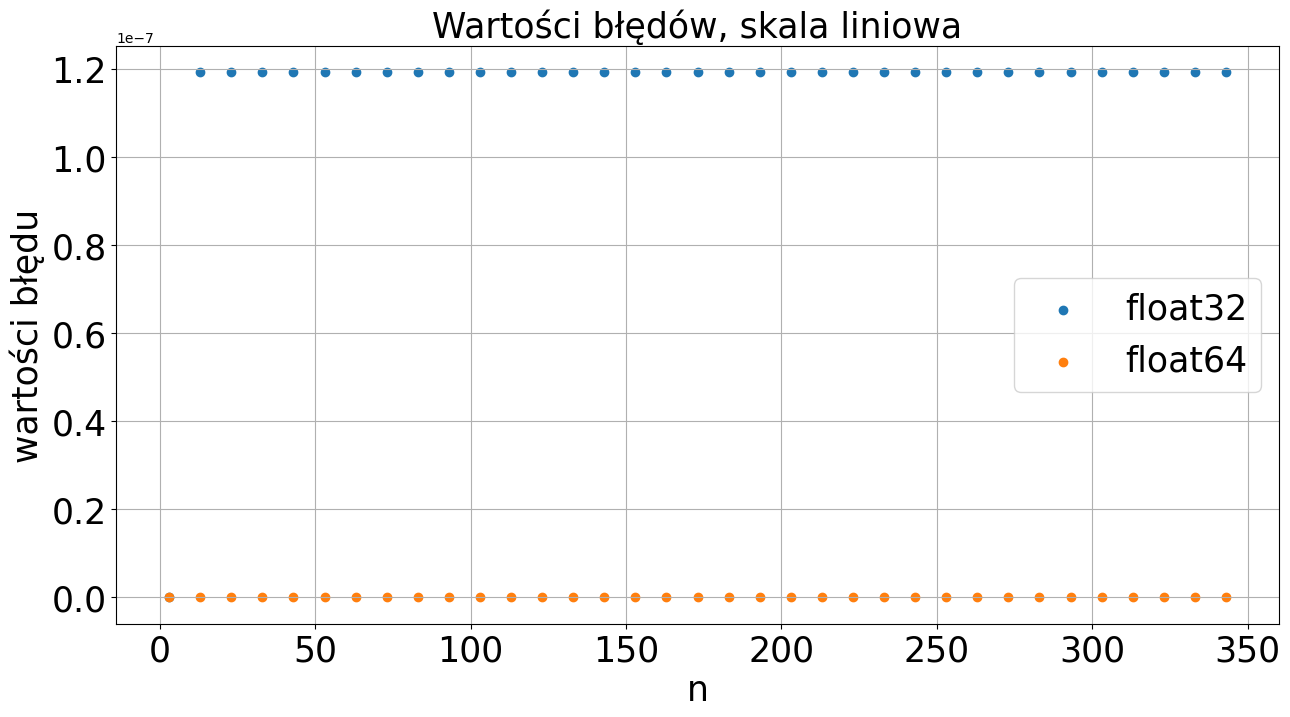

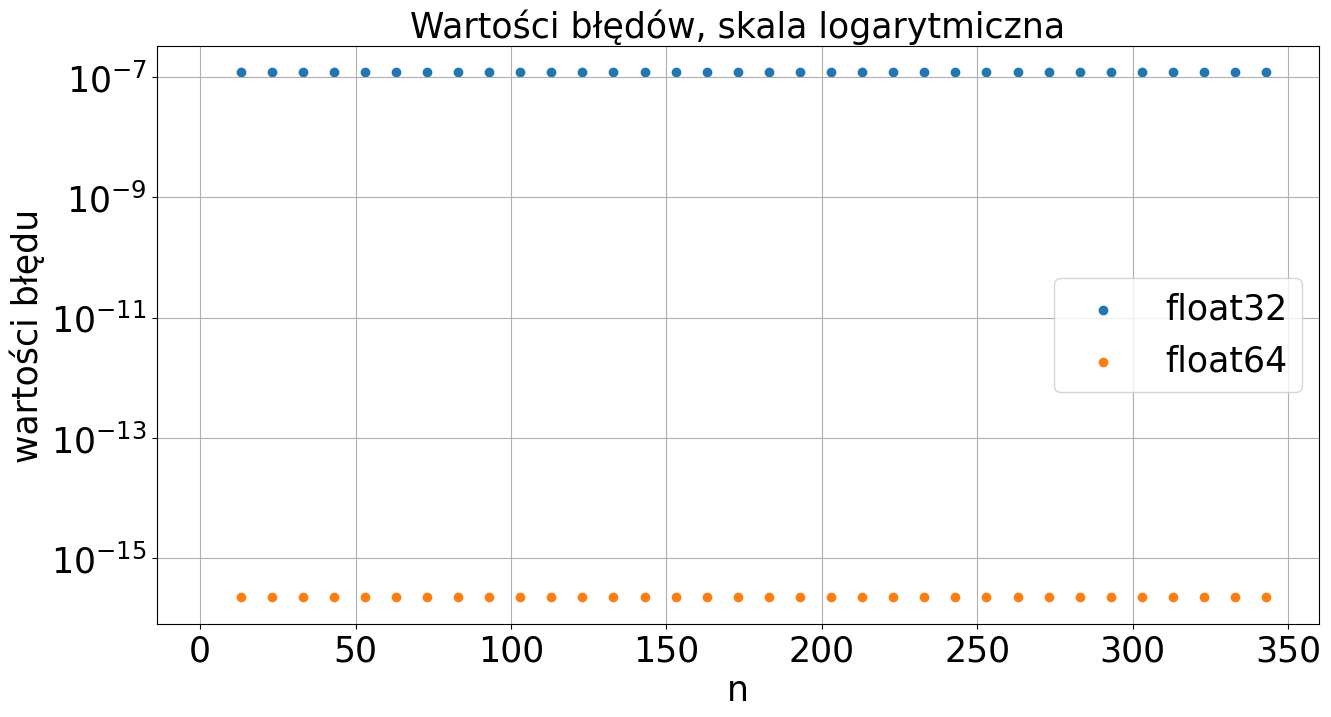

Saving data to files/errors_get_A3_normal_gauss.csv
Data saved to files/errors_get_A3_normal_gauss.csv
Saving data to files/times_get_A3_normal_gauss.csv
Data saved to files/times_get_A3_normal_gauss.csv


In [58]:
_, _, gauss_times_32, gauss_times_64 = perform_thomas_tests(get_A3_normal, gauss, include_50_and_100=True)

n = 3
n = 13
n = 23
n = 33
n = 43
n = 53
n = 63
n = 73
n = 83
n = 93
n = 103
n = 113
n = 123
n = 133
n = 143
n = 153
n = 163
n = 173
n = 183
n = 193
n = 203
n = 213
n = 223
n = 233
n = 243
n = 253
n = 263
n = 273
n = 283
n = 293
n = 303
n = 313
n = 323
n = 333
n = 343


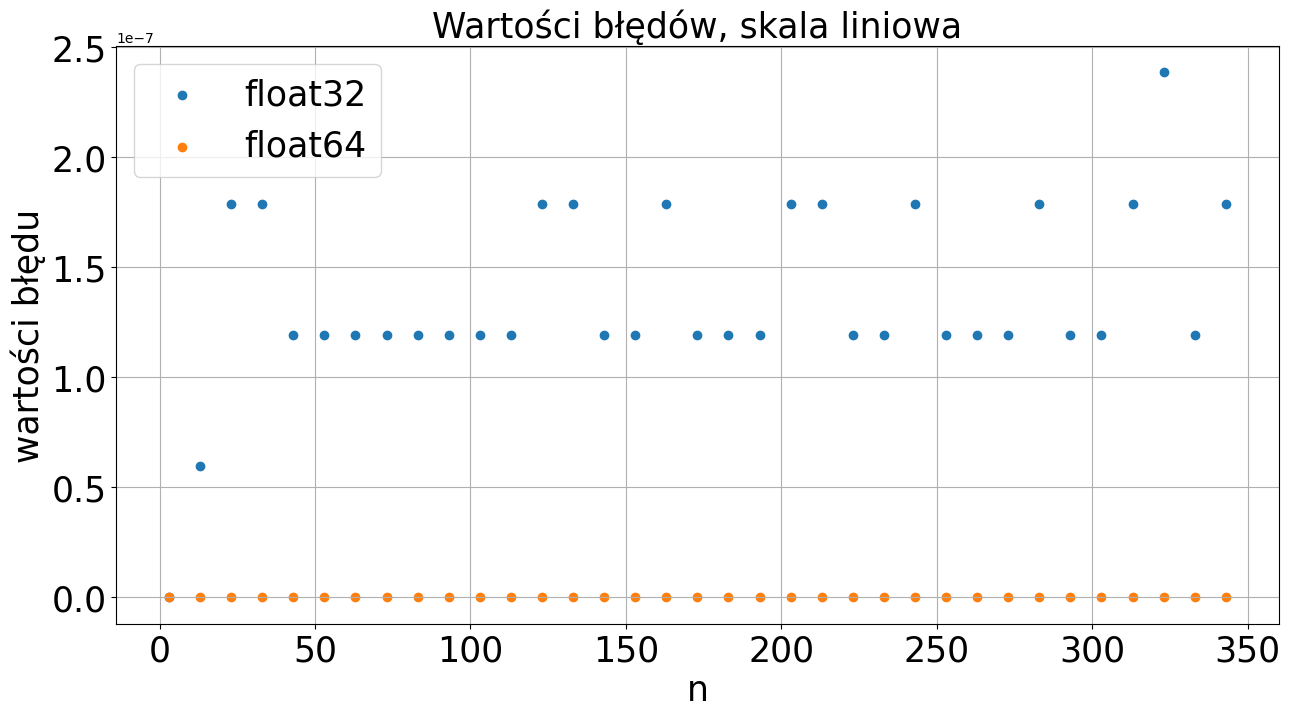

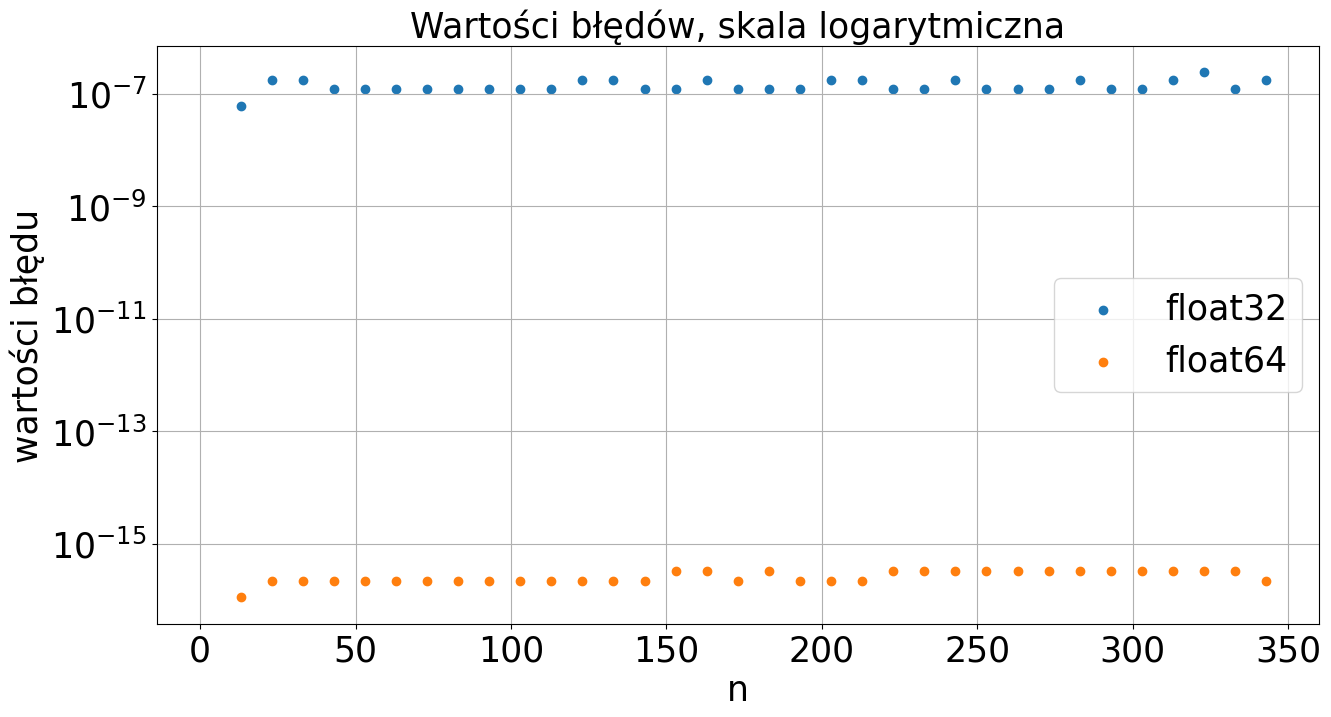

Saving data to files/errors_get_A3_band_thomas.csv
Data saved to files/errors_get_A3_band_thomas.csv
Saving data to files/times_get_A3_band_thomas.csv
Data saved to files/times_get_A3_band_thomas.csv


In [45]:
_, _, thomas_times_32, thomas_times_64 = perform_thomas_tests(get_A3_band, thomas, include_50_and_100=True,
                                                              mode="band")

In [35]:
def draw_plot_times(domain, float32_results, float64_results, title, x_label="n", y_label="wartości błędu",
                    scale_type=None,
                    filename=None, float32_label="float32", float64_label="float64", given_x_ticks=None,
                    use_x_ticks=False):
    global sizes
    x_ticks = sizes
    if given_x_ticks is not None:
        x_ticks = given_x_ticks
    default_font_size = 25
    legend_font_size = default_font_size
    title_font_size = default_font_size
    tick_params_label_size = default_font_size
    x_y_label_size = default_font_size

    fig, ax = plt.subplots(figsize=(15, 7.5))
    if scale_type is not None:
        ax.set_yscale(scale_type)
    plt.plot(domain, float32_results, label=float32_label)
    plt.plot(domain, float64_results, label=float64_label)
    plt.title(title, fontsize=title_font_size)
    plt.xlabel(x_label, fontsize=x_y_label_size)
    plt.ylabel(y_label, fontsize=x_y_label_size)
    plt.legend(fontsize=legend_font_size)
    ax.tick_params(axis='both', which='major', labelsize=tick_params_label_size)
    ax.tick_params(axis='both', which='minor', labelsize=tick_params_label_size)
    if use_x_ticks:
        plt.xticks(x_ticks[:len(float32_results)])
    plt.grid(True)
    plt.savefig(f"plots/{filename}.png")
    plt.show()

In [52]:
len(range(3, 350, 10))

35

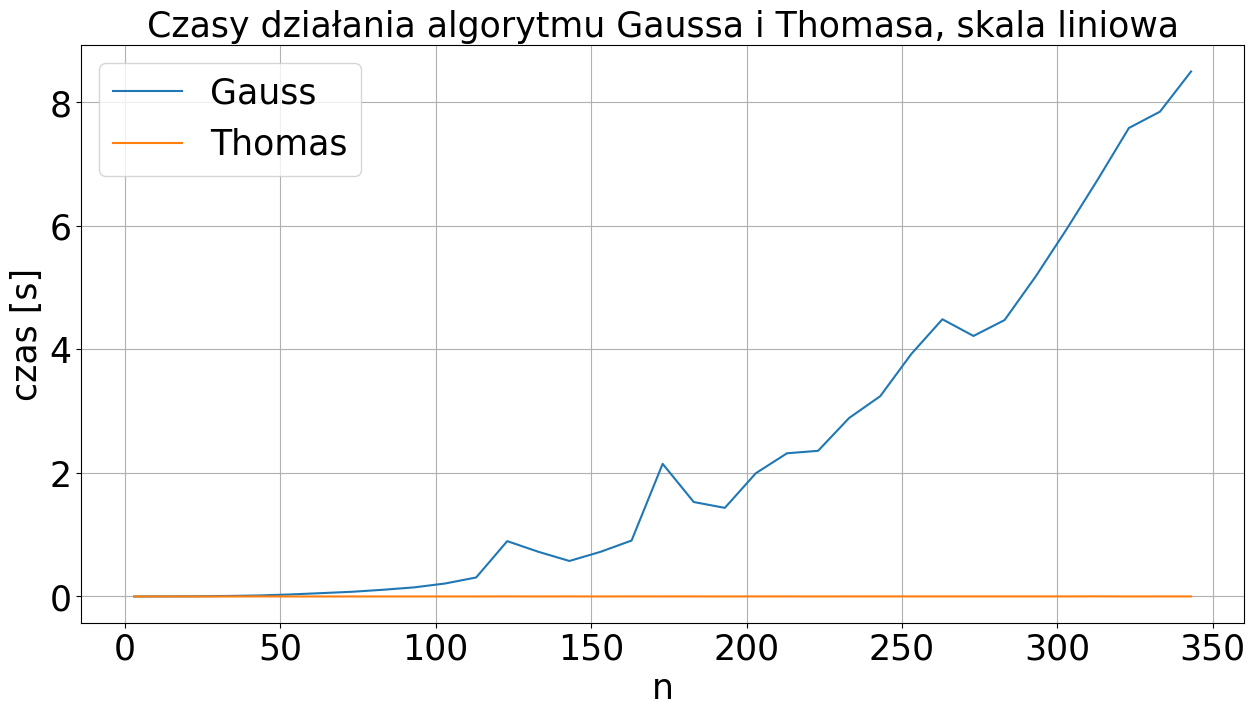

In [50]:
draw_plot_times(domain=range(3, 350, 10),
                float32_results=gauss_times_64,
                float32_label="Gauss",
                float64_label="Thomas",
                float64_results=thomas_times_64,
                title=f"Czasy działania algorytmu Gaussa i Thomasa, skala liniowa",
                x_label="n",
                y_label="czas [s]",
                filename=f"thomas_v_gauss_times_linear")

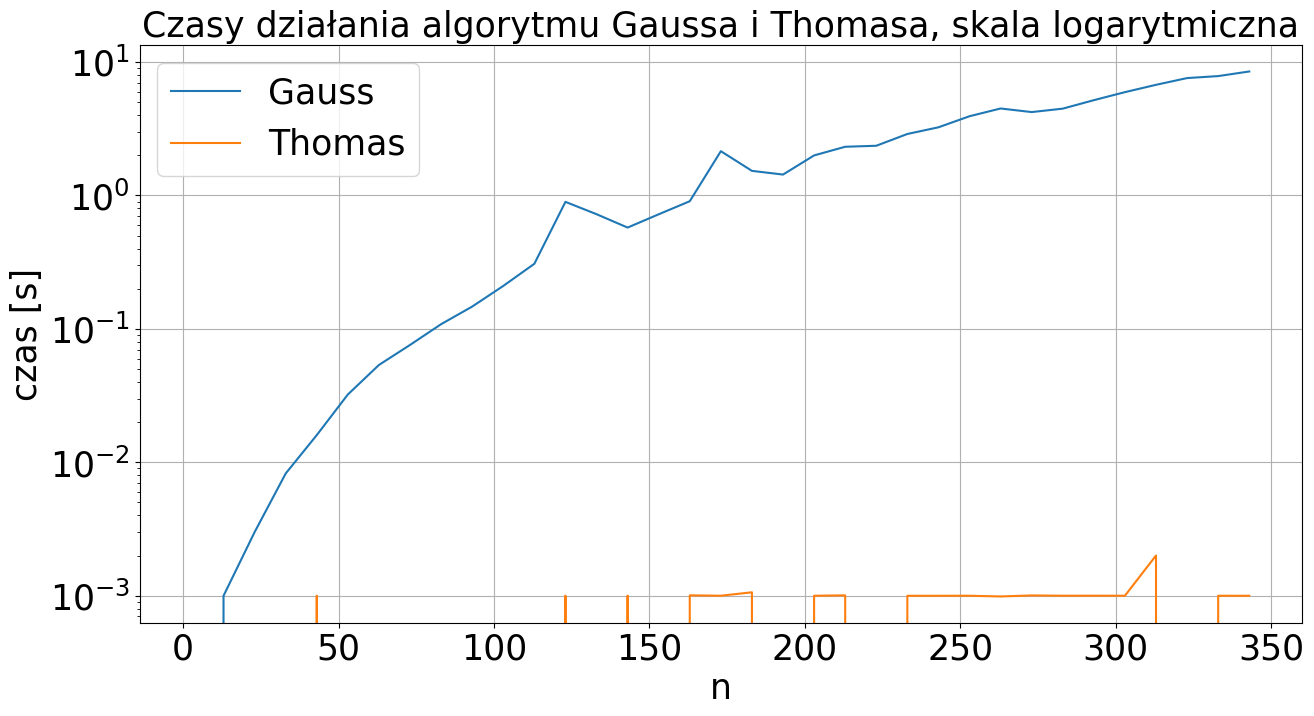

In [51]:
draw_plot_times(domain=range(3, 350, 10),
                float32_results=gauss_times_64,
                float32_label="Gauss",
                float64_results=thomas_times_64,
                float64_label="Thomas",
                title=f"Czasy działania algorytmu Gaussa i Thomasa, skala logarytmiczna",
                x_label="n",
                y_label="czas [s]",
                filename=f"thomas_v_gauss_times_log",
                scale_type="log")

In [ ]:
def investigate_cond_values():
    sizes_to_checkout = [i for i in range(3, 20 + 1)]
    A1_cond = []
    A2_cond = []
    for size in sizes_to_checkout:
        A1 = get_A1(size, np.float64)
        A2 = get_A2(size, np.float64)
        A1_cond.append(np.linalg.cond(x=A1, p=np.inf))
        A2_cond.append(np.linalg.cond(x=A2, p=np.inf))

    csv_file = [["n", "2.1", "2.2"]]
    for i in range(len(A1_cond)):
        csv_file.append([sizes_to_checkout[i], A1_cond[i], A2_cond[i]])
    save_to_csv(f"errors_cond_gauss", csv_file)

    draw_plot(domain=sizes_to_checkout, float32_results=A1_cond, float64_results=A2_cond,
              title=f"Wartości cond(A), skala liniowa",
              filename=f"cond_linear", float32_label="A1", float64_label="A2", y_label="wartości cond(A)")
    draw_plot(domain=sizes_to_checkout, float32_results=A1_cond, float64_results=A2_cond,
              title=f"Wartości cond(A), skala logarytmiczna", scale_type="log",
              filename=f"cond_log", float32_label="A1", float64_label="A2", y_label="wartości cond(A)")
    for i in range(len(sizes_to_checkout)):
        print(f"i = {i + 3}, {A1_cond[i]}, {A2_cond[i]}")


investigate_cond_values()